In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('AmsterdamHousingPrices/data.csv')

In [3]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs
0,\nCondo/Apartment\n,\nCommelinstraat 468 - Oost en Watergraafsmeer...,\n315.000 € (K.K.)\n,"\n\n3\n\n2\n\n1\n\n 71,20 \n"
1,\nCondo/Apartment\n,\nWagenaarstraat 185 - Oost en Watergraafsmeer...,\n715.000 € (K.K.)\n,"\n\n4\n\n3\n\n1\n\n 121,29 \n"
2,\nCondo/Apartment\n,\nwesterlengte 151 - Amsterdam-Noord - 1034TB ...,\n198.000 € (K.K.)\n,\n\n3\n\n2\n\n1\n\n 78 \n
3,\nCondo/Apartment\n,\nBaarsjesweg 139A - De Baarsjes - 1057 HM AMS...,\n375.000 € (K.K.)\n,"\n\n2\n\n1\n\n1\n\n 80,10 \n"
4,\nGarden Apartment\n,\nLomanstraat 95 Hs - Oud-Zuid - 1075PZ AMSTER...,\n1.250.000 € (K.K.)\n,\n\n5\n\n4\n\n2\n\n 140 \n


In [4]:
df['Special Feature'] = df['Special Feature'].str.replace('\n', '')
df['Apartment Location'] = df['Apartment Location'].str.strip('\n')
df['Apartment Price'] = df['Apartment Price'].str.replace('\n', '')
df['Room Specs'] = df['Room Specs'].str.replace('\n', '')
df['Special Feature'] = df['Special Feature'].str.replace('/', ' ')

In [5]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs
0,Condo Apartment,Commelinstraat 468 - Oost en Watergraafsmeer -...,315.000 € (K.K.),"321 71,20"
1,Condo Apartment,Wagenaarstraat 185 - Oost en Watergraafsmeer -...,715.000 € (K.K.),"431 121,29"
2,Condo Apartment,westerlengte 151 - Amsterdam-Noord - 1034TB AM...,198.000 € (K.K.),321 78
3,Condo Apartment,Baarsjesweg 139A - De Baarsjes - 1057 HM AMSTE...,375.000 € (K.K.),"211 80,10"
4,Garden Apartment,Lomanstraat 95 Hs - Oud-Zuid - 1075PZ AMSTERDAM,1.250.000 € (K.K.),542 140


In [6]:
df['Apartment Location'] = df['Apartment Location'].str.replace('-', '')
df['Apartment Price'] = df['Apartment Price'].str.replace('(K.K)', ' ')
df['Apartment Price'] = df['Apartment Price'].str.replace('.', ' ')
df['Apartment Price'] = df['Apartment Price'].str.replace('()', '')

In [7]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000 € ( ),"321 71,20"
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000 € ( ),"431 121,29"
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000 € ( ),321 78
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000 € ( ),"211 80,10"
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000 € ( ),542 140


In [8]:
df['Number of rooms'] = pd.Series(df['Room Specs']).copy()

In [9]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs,Number of rooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000 € ( ),"321 71,20","321 71,20"
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000 € ( ),"431 121,29","431 121,29"
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000 € ( ),321 78,321 78
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000 € ( ),"211 80,10","211 80,10"
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000 € ( ),542 140,542 140


In [10]:
# Get the number of rooms from the mixed values(Explain later)
df['# of rooms'] = df['Room Specs'].str[:1]

In [11]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs,Number of rooms,# of rooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000 € ( ),"321 71,20","321 71,20",3
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000 € ( ),"431 121,29","431 121,29",4
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000 € ( ),321 78,321 78,3
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000 € ( ),"211 80,10","211 80,10",2
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000 € ( ),542 140,542 140,5


In [12]:
df['# of bedrooms'] = df['Room Specs'].str[1:2]

In [13]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs,Number of rooms,# of rooms,# of bedrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000 € ( ),"321 71,20","321 71,20",3,2
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000 € ( ),"431 121,29","431 121,29",4,3
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000 € ( ),321 78,321 78,3,2
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000 € ( ),"211 80,10","211 80,10",2,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000 € ( ),542 140,542 140,5,4


In [14]:
df['# of bathrooms'] = df['Room Specs'].str[2:3]

In [15]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs,Number of rooms,# of rooms,# of bedrooms,# of bathrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000 € ( ),"321 71,20","321 71,20",3,2,1
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000 € ( ),"431 121,29","431 121,29",4,3,1
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000 € ( ),321 78,321 78,3,2,1
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000 € ( ),"211 80,10","211 80,10",2,1,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000 € ( ),542 140,542 140,5,4,2


In [16]:
df['Apartment Price'] = df['Apartment Price'].str[:7:1]

In [17]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs,Number of rooms,# of rooms,# of bedrooms,# of bathrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000,"321 71,20","321 71,20",3,2,1
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000,"431 121,29","431 121,29",4,3,1
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000,321 78,321 78,3,2,1
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000,"211 80,10","211 80,10",2,1,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 0,542 140,542 140,5,4,2


In [18]:
df.loc[4, 'Apartment Price'] = '1 250 000'

In [19]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs,Number of rooms,# of rooms,# of bedrooms,# of bathrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000,"321 71,20","321 71,20",3,2,1
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000,"431 121,29","431 121,29",4,3,1
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000,321 78,321 78,3,2,1
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000,"211 80,10","211 80,10",2,1,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000,542 140,542 140,5,4,2


In [20]:
df

,Special Feature,Apartment Location,Apartment Price,Room Specs,Number of rooms,# of rooms,# of bedrooms,# of bathrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000,"321 71,20","321 71,20",3,2,1
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000,"431 121,29","431 121,29",4,3,1
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000,321 78,321 78,3,2,1
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000,"211 80,10","211 80,10",2,1,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000,542 140,542 140,5,4,2
5,Garden Apartment,Kraaienplein 24 AmsterdamNoord 1021EG AMSTERDAM,290 000,321 68,321 68,3,2,1
6,Studio,bezaanjachtplein 81 AmsterdamNoord 1034 CR A...,165 000,1 1 29,1 1 29,1,,1
7,Condo Apartment,Berthold Brechtstraat 623 1102RS AMSTERDAM,169 000,321 58,321 58,3,2,1
8,Apartment with roof,Sijlhoff 36 OudZuid 1082EP AMSTERDAM,527 500,412 121,412 121,4,1,2
9,Condo Apartment,Veembroederhof 209 Binnenstad 1019HD AMSTERDAM,555 000,"211 119,22","211 119,22",2,1,1


In [21]:
df = df.drop(['Number of rooms'], axis=1)

In [22]:
df.head()

,Special Feature,Apartment Location,Apartment Price,Room Specs,# of rooms,# of bedrooms,# of bathrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000,"321 71,20",3,2,1
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000,"431 121,29",4,3,1
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000,321 78,3,2,1
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000,"211 80,10",2,1,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000,542 140,5,4,2


In [23]:
df = df.drop(['Room Specs'], axis=1)

In [24]:
df.head()

,Special Feature,Apartment Location,Apartment Price,# of rooms,# of bedrooms,# of bathrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000,3,2,1
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000,4,3,1
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000,3,2,1
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000,2,1,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000,5,4,2


In [25]:
df['Apartment Price'] = df['Apartment Price'].replace('', ',')

In [26]:
df.head()

,Special Feature,Apartment Location,Apartment Price,# of rooms,# of bedrooms,# of bathrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315 000,3,2,1
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715 000,4,3,1
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198 000,3,2,1
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375 000,2,1,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1 250 000,5,4,2


In [27]:
# Remove space from Apartment Price data
df['Apartment Price'] = df['Apartment Price'].str.replace(' ', '')

In [28]:
df.head()

,Special Feature,Apartment Location,Apartment Price,# of rooms,# of bedrooms,# of bathrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315000,3,2,1
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715000,4,3,1
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198000,3,2,1
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375000,2,1,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1250000,5,4,2


In [29]:
# Change Apartment Price datatype from string to int
df['Apartment Price'] = (df['Apartment Price']).astype(int)

In [30]:
df.head()

,Special Feature,Apartment Location,Apartment Price,# of rooms,# of bedrooms,# of bathrooms
0,Condo Apartment,Commelinstraat 468 Oost en Watergraafsmeer 1...,315000,3,2,1
1,Condo Apartment,Wagenaarstraat 185 Oost en Watergraafsmeer 1...,715000,4,3,1
2,Condo Apartment,westerlengte 151 AmsterdamNoord 1034TB AMSTE...,198000,3,2,1
3,Condo Apartment,Baarsjesweg 139A De Baarsjes 1057 HM AMSTERDAM,375000,2,1,1
4,Garden Apartment,Lomanstraat 95 Hs OudZuid 1075PZ AMSTERDAM,1250000,5,4,2


AttributeError: 'str' object has no attribute 'conjugate'

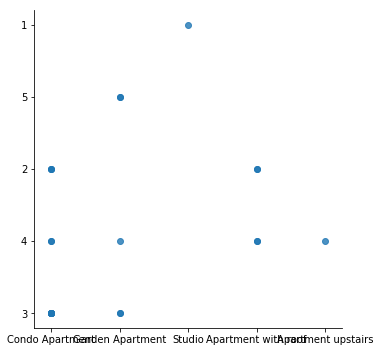

In [31]:
#Draw plots
sns.lmplot(x='Special Feature', y='# of rooms', data=df)